In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px 

In [44]:
#loading the first dataset in 

url = 'https://github.com/tmartabano/Project-for-Data-Munging/raw/main/2000-2019.csv'
df1 = pd.read_csv(url)
df1.head()
#standardizing some of the measures 
df1['tempo'] = df1['tempo'].round(0)
df1['main_genre'] = df1['genre'].str.split(',').str[0]
df1['year'] = df1['year'].astype(float)

df1.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,main_genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000.0,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.0,pop,pop
1,blink-182,All The Small Things,167066,False,1999.0,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,149.0,"rock, pop",rock
2,Faith Hill,Breathe,250546,False,1999.0,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,137.0,"pop, country",pop
3,Bon Jovi,It's My Life,224493,False,2000.0,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,120.0,"rock, metal",rock
4,*NSYNC,Bye Bye Bye,200560,False,2000.0,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,173.0,pop,pop


In [45]:
#loading in second dataset
url = 'https://raw.githubusercontent.com/tmartabano/Project-for-Data-Munging/main/top_10000_1960-now.csv'
df2 = pd.read_csv(url)

#standardizing some measures 
df2['Tempo'] = df2['Tempo'].round(0)
df2['year'] = df2['Album Release Date'].str[-2:].astype(float)

#separating the dates from < 2000 and after > 2000
df2.loc[df2['year'] < 50, 'year'] += 2000
df2.loc[df2['year'] < 100, 'year'] += 1900
df2['year']
df2 = df2.sort_values(by='year', ascending=False)
df2



,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights,year
9998,spotify:track:3iKuIfvoU50eww6EVzNqHo,Padam Padam,spotify:artist:4RVnAU35WRWra6OZ3CbbMA,Kylie Minogue,spotify:album:0OHc8STurn45gpk3dyIiw5,Padam Padam,spotify:artist:4RVnAU35WRWra6OZ3CbbMA,Kylie Minogue,5/19/23,https://i.scdn.co/image/ab67616d0000b2730536a8...,...,0.2140,0.001160,0.1030,0.711,128.0,4.0,NaN,Liberator Music,C 2023 Kylie Minogue/Darenote under exclusive ...,2023.0
9991,spotify:track:3AjSfp5FDvwtMU9XBsbS8j,Push Up - Main Edit,spotify:artist:2gW0M5fn2r7Lo4Hn1r8HZ5,Creeds,spotify:album:3v5BP6gPT1nNU9rjs57fF0,Push Up (Main Edit),spotify:artist:2gW0M5fn2r7Lo4Hn1r8HZ5,Creeds,3/31/23,https://i.scdn.co/image/ab67616d0000b273b1f8e7...,...,0.2090,0.836000,0.0582,0.187,75.0,4.0,NaN,Columbia/B1 Recordings,"P (P) 2023 Rave Alert Records, under exclusive...",2023.0
2428,spotify:track:3k79jB4aGmMDUQzEwa46Rz,vampire,spotify:artist:1McMsnEElThX1knmY4oliG,Olivia Rodrigo,spotify:album:5kqfR7EuGbyp8x27Pr1kY9,vampire,spotify:artist:1McMsnEElThX1knmY4oliG,Olivia Rodrigo,6/30/23,https://i.scdn.co/image/ab67616d0000b2731e5e75...,...,0.1690,0.000000,0.3110,0.322,138.0,4.0,NaN,Olivia Rodrigo PS,"C © 2023 Olivia Rodrigo, under exclusive licen...",2023.0
9935,spotify:track:6UbNrW8X1v4oOR29vzSVqX,One Day At A Time,"spotify:artist:2mF9PcfpN8vxRtCfra8hz1, spotify...","Thierry Von Der Warth, Jay Mason",spotify:album:5qrQjiR5PsDykstHLRAK23,One Day At A Time,"spotify:artist:2mF9PcfpN8vxRtCfra8hz1, spotify...","Thierry Von Der Warth, Jay Mason",3/3/23,https://i.scdn.co/image/ab67616d0000b2734fe2e6...,...,0.2240,0.000135,0.1170,0.526,122.0,4.0,NaN,Paraiso,"C 2023 Thierry Von Der Warth & Jay Mason, P 20...",2023.0
7789,spotify:track:5eTaQYBE1yrActixMAeLcZ,Miracle (with Ellie Goulding),"spotify:artist:7CajNmpbOovFoOoasH2HaY, spotify...","Calvin Harris, Ellie Goulding",spotify:album:22UyygZceCIfoE0RhENgKx,Miracle (with Ellie Goulding),"spotify:artist:7CajNmpbOovFoOoasH2HaY, spotify...","Calvin Harris, Ellie Goulding",3/10/23,https://i.scdn.co/image/ab67616d0000b273c58e22...,...,0.0378,0.044600,0.0808,0.306,143.0,4.0,NaN,Columbia,P (P) 2023 Sony Music Entertainment UK Limited,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2356,spotify:track:33aYzW5ToRjiFOzkubeJ8H,Rave On,"spotify:artist:3wYyutjgII8LJVVOLrGI0D, spotify...","Buddy Holly, The Crickets",spotify:album:4Qy0SOU9Jg7Td10K68SanP,Buddy Holly,spotify:artist:3wYyutjgII8LJVVOLrGI0D,Buddy Holly,1958,https://i.scdn.co/image/ab67616d0000b27358816b...,...,0.6110,0.000007,0.4170,0.961,160.0,4.0,NaN,Geffen,"C © 1958 UMG Recordings Inc., P This Compilati...",1958.0
4106,spotify:track:6xNwKNYZcvgV3XTIwsgNio,Heartbreak Hotel,spotify:artist:43ZHCT0cAZBISjO8DG9PnE,Elvis Presley,spotify:album:0C3t1htEDTFKcg7F2rNbek,Elvis' Golden Records,spotify:artist:43ZHCT0cAZBISjO8DG9PnE,Elvis Presley,3/21/58,https://i.scdn.co/image/ab67616d0000b27320ee3e...,...,0.8400,0.000002,0.1070,0.717,94.0,4.0,NaN,RCA Records Label,P (P) 1958 Sony Music Entertainment,1958.0
7007,spotify:track:47gmoUrZV3w20JAnQOZMcO,Blue Suede Shoes,spotify:artist:43ZHCT0cAZBISjO8DG9PnE,Elvis Presley,spotify:album:7GXP5OhYyPVLmcVfO9Iqin,Elvis Presley,spotify:artist:43ZHCT0cAZBISjO8DG9PnE,Elvis Presley,3/23/56,https://i.scdn.co/image/ab67616d0000b273f45cec...,...,0.6540,0.000002,0.1380,0.962,95.0,4.0,NaN,RCA Victor,P (P) 1956 Sony Music Entertainment,1956.0
2714,spotify:local:The+Beatles:1962-1966:You%27ve+G...,You've Got To Hide Your Love Away,NaN,The Beatles,NaN,1962-1966,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
#sett of conditions to get the genre into usable data
conditions = [
    df2['Artist Genres'].str.contains('pop', case=False, na=False),
    df2['Artist Genres'].str.contains('rock', case=False, na=False),
    df2['Artist Genres'].str.contains('hip hop', case=False, na=False),
    df2['Artist Genres'].str.contains('country', case=False, na=False),
     df2['Artist Genres'].str.contains('soul', case=False, na=False)
]

#possible genres if not its other 
categories = ['pop', 'rock', 'hip hop', 'country','soul']

# Apply the conditions and assign categories
df2['Genre Category'] = np.select(conditions, categories, default='Other')
df2.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights,year,Genre Category
9998,spotify:track:3iKuIfvoU50eww6EVzNqHo,Padam Padam,spotify:artist:4RVnAU35WRWra6OZ3CbbMA,Kylie Minogue,spotify:album:0OHc8STurn45gpk3dyIiw5,Padam Padam,spotify:artist:4RVnAU35WRWra6OZ3CbbMA,Kylie Minogue,5/19/23,https://i.scdn.co/image/ab67616d0000b2730536a8...,...,0.001160,0.1030,0.711,128.0,4.0,NaN,Liberator Music,C 2023 Kylie Minogue/Darenote under exclusive ...,2023.0,pop
9991,spotify:track:3AjSfp5FDvwtMU9XBsbS8j,Push Up - Main Edit,spotify:artist:2gW0M5fn2r7Lo4Hn1r8HZ5,Creeds,spotify:album:3v5BP6gPT1nNU9rjs57fF0,Push Up (Main Edit),spotify:artist:2gW0M5fn2r7Lo4Hn1r8HZ5,Creeds,3/31/23,https://i.scdn.co/image/ab67616d0000b273b1f8e7...,...,0.836000,0.0582,0.187,75.0,4.0,NaN,Columbia/B1 Recordings,"P (P) 2023 Rave Alert Records, under exclusive...",2023.0,Other
2428,spotify:track:3k79jB4aGmMDUQzEwa46Rz,vampire,spotify:artist:1McMsnEElThX1knmY4oliG,Olivia Rodrigo,spotify:album:5kqfR7EuGbyp8x27Pr1kY9,vampire,spotify:artist:1McMsnEElThX1knmY4oliG,Olivia Rodrigo,6/30/23,https://i.scdn.co/image/ab67616d0000b2731e5e75...,...,0.000000,0.3110,0.322,138.0,4.0,NaN,Olivia Rodrigo PS,"C © 2023 Olivia Rodrigo, under exclusive licen...",2023.0,pop
9935,spotify:track:6UbNrW8X1v4oOR29vzSVqX,One Day At A Time,"spotify:artist:2mF9PcfpN8vxRtCfra8hz1, spotify...","Thierry Von Der Warth, Jay Mason",spotify:album:5qrQjiR5PsDykstHLRAK23,One Day At A Time,"spotify:artist:2mF9PcfpN8vxRtCfra8hz1, spotify...","Thierry Von Der Warth, Jay Mason",3/3/23,https://i.scdn.co/image/ab67616d0000b2734fe2e6...,...,0.000135,0.1170,0.526,122.0,4.0,NaN,Paraiso,"C 2023 Thierry Von Der Warth & Jay Mason, P 20...",2023.0,Other
7789,spotify:track:5eTaQYBE1yrActixMAeLcZ,Miracle (with Ellie Goulding),"spotify:artist:7CajNmpbOovFoOoasH2HaY, spotify...","Calvin Harris, Ellie Goulding",spotify:album:22UyygZceCIfoE0RhENgKx,Miracle (with Ellie Goulding),"spotify:artist:7CajNmpbOovFoOoasH2HaY, spotify...","Calvin Harris, Ellie Goulding",3/10/23,https://i.scdn.co/image/ab67616d0000b273c58e22...,...,0.044600,0.0808,0.306,143.0,4.0,NaN,Columbia,P (P) 2023 Sony Music Entertainment UK Limited,2023.0,pop


In [47]:
#loading in the third and final dataset 

url = 'https://raw.githubusercontent.com/tmartabano/Project-for-Data-Munging/main/30ksongs.csv'
df3 = pd.read_csv(url)

# standardizing the year into a usable format
df3['year'] = pd.to_datetime(df3['track_album_release_date'], errors='coerce').dt.year
#df3['year'] = df3['year'].astype(float)
#df3 = df3.sort_values(by='year', ascending=False)

good_df = df3[df3['year'] < 2025]
error_df = df3[df3['year'] > 2025]

error_df = error_df.copy()
error_df.loc[error_df['year'] > 2025, 'year'] -= 100
fix_df = error_df

df3_b = pd.concat([good_df, fix_df], ignore_index=True)
df3_b['year'] = df3_b['year'].astype(float)

In [94]:
#test code block
df4 = df3[['track_name', 'track_artist', 'playlist_genre']]
#df4['track_name'].groupby(df4['playlist_genre']).count()

In [50]:
#formatting the data we want into new dataframes with uniform column names 

# For df1
df4 = df1[['song', 'artist', 'year', 'duration_ms', 'key', 'loudness', 'mode', 'tempo', 'main_genre']]
df4.columns = ['song', 'artist', 'year', 'duration_ms', 'key', 'loudness', 'mode', 'tempo', 'main_genre']
# For df2
df5 = df2[['Track Name', 'Artist Name(s)', 'year', 'Track Duration (ms)', 'Key', 'Loudness', 'Mode', 'Tempo', 'Genre Category']]
df5.columns = ['song', 'artist', 'year', 'duration_ms', 'key', 'loudness', 'mode', 'tempo', 'main_genre']
# For df3
df6 = df3_b[['track_name', 'track_artist', 'year', 'duration_ms', 'key', 'loudness', 'mode', 'tempo', 'playlist_genre']]
df6.columns = ['song', 'artist', 'year', 'duration_ms', 'key', 'loudness', 'mode', 'tempo', 'main_genre']

In [38]:
#joining the 3 dfs into 1 df and getting rid of missing values 
frames = [df4, df5, df6]
big_df = pd.concat(frames)
missing_values = big_df.isnull().sum()
missing_values
big_df.drop_duplicates(subset=['song'], inplace=True)
big_df = big_df[big_df['tempo'] != 0]
big_df['tempo'] = big_df['tempo'].round(0)

In [84]:
#start of new method 

#df6 = df6.dropna()
#df5 = df5.dropna()
#df4 = df4.dropna()
big_df.dropna(inplace=True)
big_df.isnull().sum()

song           0
artist         0
year           0
duration_ms    0
key            0
loudness       0
mode           0
tempo          0
main_genre     0
decade         0
minutes        0
dtype: int64

In [95]:
#code that fixes the issue with the year and creates decades column
condition = big_df['year'] > 2025
big_df.loc[condition, 'year'] -= 100
sorted_value_counts = big_df['year'].value_counts().sort_index(ascending=False)

big_df['decade'] = big_df['year'].astype(str).str[2:3] + '0s'
big_df['decade'] = big_df['decade'].replace({'50s': '1950s', '60s': '1960s', '70s': '1970s', '80s': '1980s', '90s': '1990s', '00s': '2000s', '10s': '2010s', '20s': '2020s'})


In [59]:
#rounding tempo has it is measured by nearest whole number 
big_df['tempo'] = big_df['tempo'].round(0)
big_df['minutes'] = big_df['duration_ms'] / 60000



In [60]:
genre_counts = big_df['main_genre'].value_counts()

# Replace genres with count <= 10 with 'Other'
big_df['main_genre'] = big_df['main_genre'].apply(lambda x: 'Other' if genre_counts[x] <= 10 else x)
big_df['main_genre'] = big_df['main_genre'].replace('r&b', 'R&B')

In [61]:
#set is put into other genre because we have no clue what set() music is!!!
big_df['main_genre'] = big_df['main_genre'].replace('set()', 'Other')


In [62]:
#Part 2: Analysis 

In [63]:
#What genre has the most songs in our dataset?
Total_song_genre = big_df.groupby('main_genre')['song'].count().sort_values(ascending=False)
Total_song_genre

main_genre
pop                 7705
rock                4677
rap                 4546
edm                 3678
latin               3256
R&B                 3086
Other               1368
hip hop              842
soul                 204
country               53
Dance/Electronic      37
Name: song, dtype: int64

In [64]:
data = {
    'song': ['pop', 'rock', 'rap', 'edm', 'latin', 'R&B', 'Other', 'hip hop', 'soul', 'country', 'Dance/Electronic'],
    'count': [7705, 4677, 4546, 3678, 3256, 3086, 1370, 842, 204, 53, 37]
}
perc_df = pd.DataFrame(data)

perc_df['percentage'] = (perc_df['count'] / perc_df['count'].sum()) * 100
perc_df

,song,count,percentage
0,pop,7705,26.159435
1,rock,4677,15.878998
2,rap,4546,15.434236
3,edm,3678,12.487268
4,latin,3256,11.054526
5,R&B,3086,10.477355
6,Other,1370,4.651321
7,hip hop,842,2.858695
8,soul,204,0.692605
9,country,53,0.179942


In [65]:
#This data is for question 2 (duration)

In [66]:
#what Genre on average has the longest songs 
avg_duration = big_df.groupby('main_genre')['duration_ms'].mean().sort_values(ascending = False)
avg_min = avg_duration / 60000
avg_min

main_genre
Dance/Electronic    4.042049
rock                4.001128
R&B                 3.968907
hip hop             3.885630
edm                 3.848132
pop                 3.685785
latin               3.647511
Other               3.606211
soul                3.575985
rap                 3.520967
country             3.362379
Name: duration_ms, dtype: float64

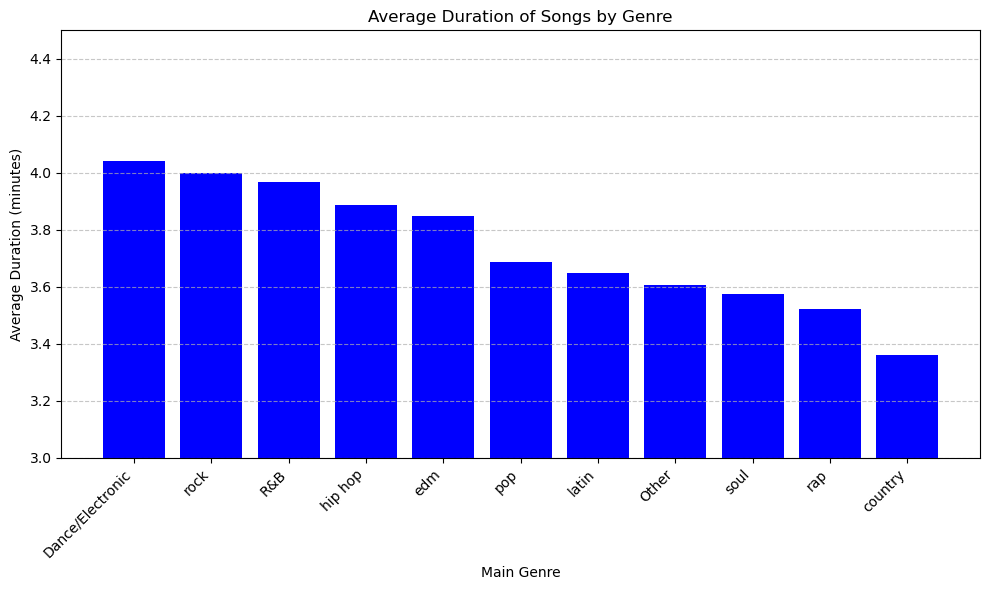

In [67]:
#Bar Chart of average duration of songs by genre
plt.figure(figsize=(10, 6))
plt.bar(avg_min.index, avg_min.values, color= 'blue')
plt.xlabel('Main Genre')
plt.ylabel('Average Duration (minutes)')
plt.title('Average Duration of Songs by Genre')
plt.xticks(rotation=45, ha='right')
plt.ylim(3.0, 4.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the bar graph
plt.tight_layout()
plt.show()

In [96]:
#comparison across genre 
genre_compare_df = big_df.groupby('main_genre')[['loudness', 'tempo', 'minutes']].mean()
#genre_compare_df.plot.scatter( 'loudness', 'tempo', s = genre_compare_df['minutes'] * 1000)


In [69]:
#Data below is for tempo analysis (John)

In [97]:
#On avgeage what genre has the fastest tempo 
avg_tempo = big_df.groupby('main_genre')['tempo'].mean().sort_values(ascending = False)
avg_tempo

main_genre
country             129.660377
edm                 126.247145
Dance/Electronic    124.891892
rock                124.438743
Other               121.578216
pop                 121.144841
rap                 120.619446
latin               119.000307
hip hop             117.884798
soul                117.823529
R&B                 113.890473
Name: tempo, dtype: float64

In [71]:
#what are the top 25 songs with the fastest tempo?
top25 = big_df.sort_values('tempo').tail(25)
top25 
top25['minutes_interval'] = pd.cut(top25['minutes'], bins=range(0, int(top25['minutes'].max()) + 1, 1)) #makes it increment by 1 minute
grouped_top25 = top25.groupby('minutes_interval').count()
grouped_top25


,song,artist,year,duration_ms,key,loudness,mode,tempo,main_genre,decade,minutes
minutes_interval,,,,,,,,,,,
"(0, 1]",0,0,0,0,0,0,0,0,0,0,0
"(1, 2]",2,2,2,2,2,2,2,2,2,2,2
"(2, 3]",6,6,6,6,6,6,6,6,6,6,6
"(3, 4]",8,8,8,8,8,8,8,8,8,8,8
"(4, 5]",8,8,8,8,8,8,8,8,8,8,8


In [85]:
tempo_df_all = big_df[['main_genre', 'tempo']].copy()
# bin_edges = np.arange(0, 241, 4)
# tempo_df['tempo_bins'] = (pd.cut(tempo_df['tempo'], bins=bin_edges, labels=bin_edges[1:])).astype(str)
tempo_df = tempo_df_all[~tempo_df_all['main_genre'].isin(['Other', 'set()'])]
tempo_df = tempo_df.sort_values(by='tempo')


In [77]:
#tempo further analysis
tempo_detail = big_df.groupby('main_genre')[['tempo']].mean()
tempo_detail['tempo_stdev'] = big_df.groupby('main_genre')[['tempo']].std()
tempo_detail['min'] = big_df.groupby('main_genre')[['tempo']].min()
tempo_detail['max'] = big_df.groupby('main_genre')[['tempo']].max()
tempo_detail['difference'] = big_df.groupby('main_genre')[['tempo']].max() - big_df.groupby('main_genre')[['tempo']].min()
tempo_detail = tempo_detail.sort_values(by='tempo', ascending=False).round(0)
tempo_detail

,tempo,tempo_stdev,min,max,difference
main_genre,,,,,
country,130.0,31.0,77.0,206.0,129.0
edm,126.0,14.0,60.0,220.0,160.0
Dance/Electronic,125.0,15.0,91.0,174.0,83.0
rock,124.0,28.0,37.0,218.0,181.0
Other,122.0,25.0,35.0,203.0,168.0
pop,121.0,26.0,35.0,212.0,177.0
rap,121.0,31.0,39.0,212.0,173.0
latin,119.0,29.0,60.0,239.0,179.0
hip hop,118.0,28.0,60.0,208.0,148.0


<Axes: xlabel='main_genre'>

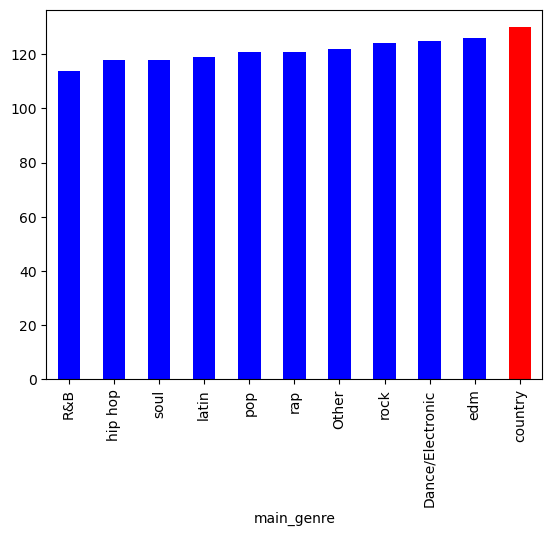

In [86]:
tempo_detail = tempo_detail.sort_values('tempo', ascending=True)
tempo_detail['tempo'].plot(kind='bar', color=['blue'] * (len(tempo_detail) - 1) + ['red'])
#plt.show()


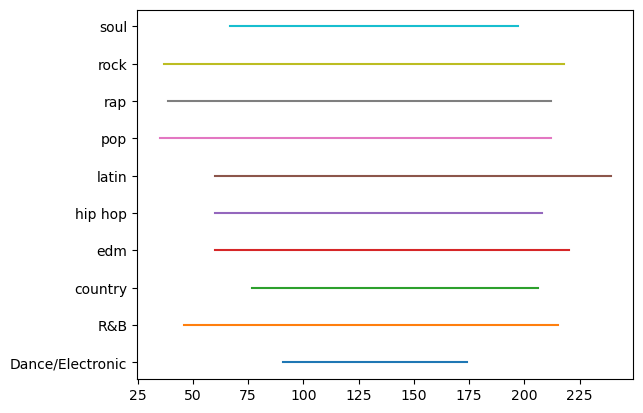

In [76]:
#figure out how to order by size 
import matplotlib.pyplot as plt
for genre, group in tempo_counts.groupby('main_genre'):
    plt.plot(group['tempo'], group['main_genre'], label=genre)

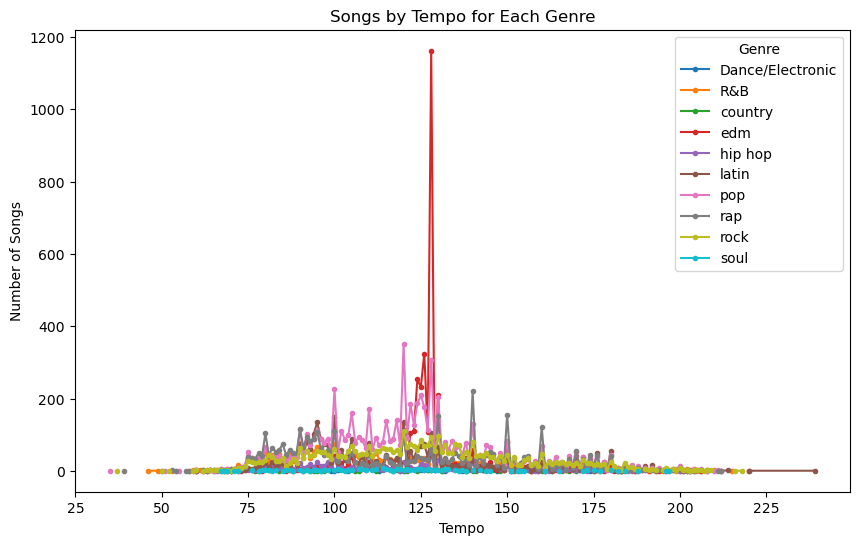

In [75]:
tempo_counts = tempo_df.groupby(['main_genre', 'tempo']).size().reset_index(name='count')

pivot_df = tempo_counts.pivot(index='tempo', columns='main_genre', values='count')

pivot_df.plot(kind='line', marker='.', figsize=(10, 6))
plt.title('Songs by Tempo for Each Genre')
plt.xlabel('Tempo')
plt.ylabel('Number of Songs')
plt.legend(title='Genre')
plt.show()

In [41]:
#Next Section is examaining the modality


In [87]:
#mode count by genre (fixed)
mode_counts = big_df.groupby('main_genre')['mode'].value_counts()

In [88]:
mode_perc = big_df.groupby('main_genre')['mode'].value_counts(normalize=True).rename('percentage').reset_index()

mode_perc['percentage'] = (mode_perc['percentage'] * 100).round(2)
#function to detect the type of key it is in 
mode_perc['type'] = mode_perc['mode'].apply(lambda x: 'Major' if x == 1 else 'Minor')
# rearranging the order of the columns
mode_perc = mode_perc.iloc[:,[0,1,3,2]] #reordering the columns 


Enter a music genre:  edm


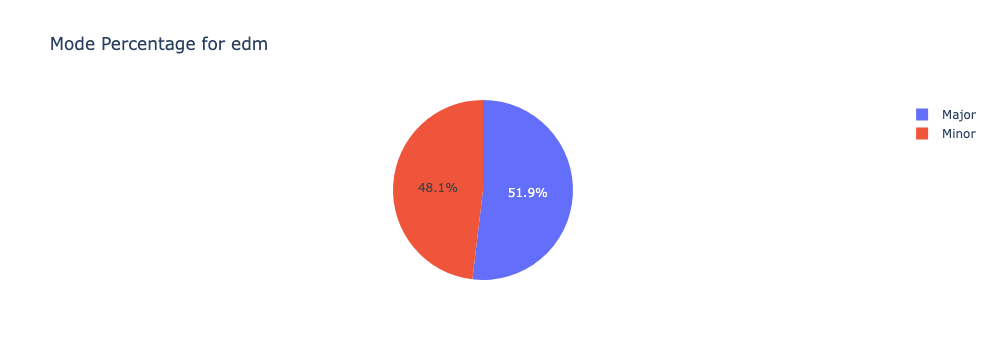

In [107]:
#cleaner code than below (let John and Bella decide which ones stay in)
#edm has the most even splits, country has the worst
genre = input("Enter a music genre: ")
selected_data = mode_perc[mode_perc['main_genre'] == genre]

if not selected_data.empty:
    fig = go.Figure(data=[go.Pie(labels=selected_data['type'], values=selected_data['percentage'])])
    fig.update_layout(title=f'Mode Percentage for {genre}')
    fig.show()
else:
    print("Genre not found in the dataset")

In [18]:
pop_data = mode_perc[mode_perc['main_genre'] == 'pop']
edm_data = mode_perc[mode_perc['main_genre'] == 'edm']
rock_data = mode_perc[mode_perc['main_genre'] == 'rock']
rnb_data = mode_perc[mode_perc['main_genre'] == 'R&B']
hiphop_data =  mode_perc[mode_perc['main_genre'] == 'hip hop']
latin_data = mode_perc[mode_perc['main_genre'] == 'latin']
other_data = mode_perc[mode_perc['main_genre'] == 'Other']
soul_data = mode_perc[mode_perc['main_genre'] == 'soul']
rap_data = mode_perc[mode_perc['main_genre'] == 'rap']
electronic_data = mode_perc[mode_perc['main_genre'] == 'Dance/Electronic']
country_data = mode_perc[mode_perc['main_genre'] == 'country']

Enter a music genre:  country


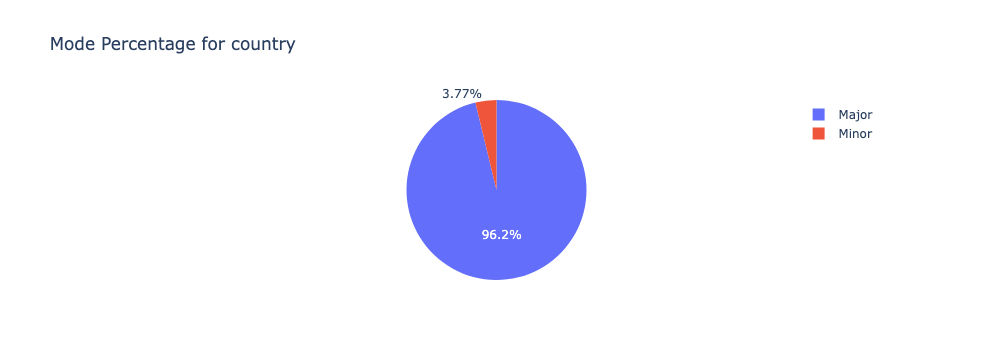

In [29]:
#same graph, just using a dictionary (Don't Present)

#dictionary mapping to select what dataset you want to use 
music_genres = {
    "Dance/Electronic": electronic_data,
    "rock": rock_data,
    "r&b": rnb_data,
    "hip hop": hiphop_data,
    "edm": edm_data,
    "pop": pop_data,
    "latin": latin_data,
    "other": other_data,
    "soul": soul_data,
    "rap": rap_data,
    "country": country_data
}

genre = input("Enter a music genre: ")
selected_data = music_genres.get(genre, None)

if selected_data is not None:
    fig = go.Figure(data=[go.Pie(labels=selected_data['type'], values=selected_data['percentage'])])
    fig.update_layout(title=f'Mode Percentage for {genre}')
    fig.show()
else:
    print("Genre not found in the dictionary")

In [83]:
mode_perc = big_df.groupby('main_genre')['mode'].value_counts(normalize=True).rename('percentage').reset_index()

mode_perc['percentage'] = (mode_perc['percentage'] * 100).round(2)
#function to detect the type of key it is in 
mode_perc['type'] = mode_perc['mode'].apply(lambda x: 'Major' if x == 1 else 'Minor')
# rearranging the order of the columns
mode_perc = mode_perc.iloc[:,[0,1,3,2]] #reordering the columns 
mode_perc

,main_genre,mode,type,percentage
0,Dance/Electronic,1.0,Major,56.76
1,Dance/Electronic,0.0,Minor,43.24
2,Other,1.0,Major,71.35
3,Other,0.0,Minor,28.65
4,R&B,1.0,Major,52.04
5,R&B,0.0,Minor,47.96
6,country,1.0,Major,96.23
7,country,0.0,Minor,3.77
8,edm,1.0,Major,51.88
9,edm,0.0,Minor,48.12


In [144]:
#This section will be exmaining duration of songs by genre  (Bella)

In [92]:
dec = big_df
dec = dec.groupby('decade').mean(numeric_only=True)
#ord_dec2(pop_dec).dropna()

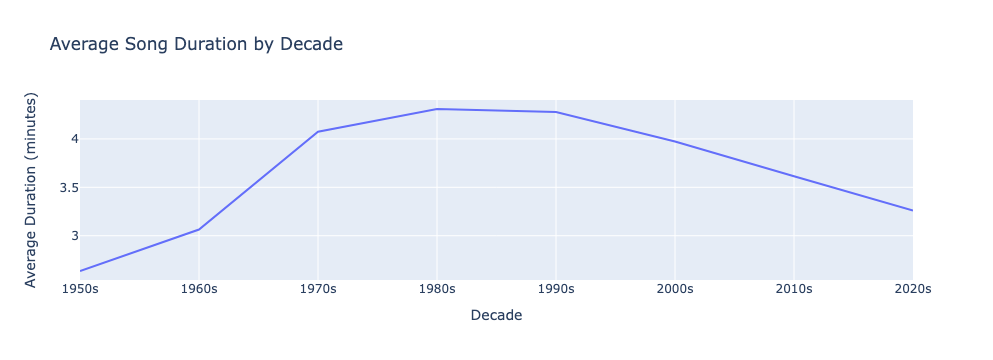

In [285]:
fig = go.Figure(data=go.Scatter(x=dec.index, y = dec['minutes'], mode='lines'))

fig.update_layout(title='Average Song Duration by Decade', xaxis_title='Decade', yaxis_title='Average Duration (minutes)')



Enter a music genre:  pop


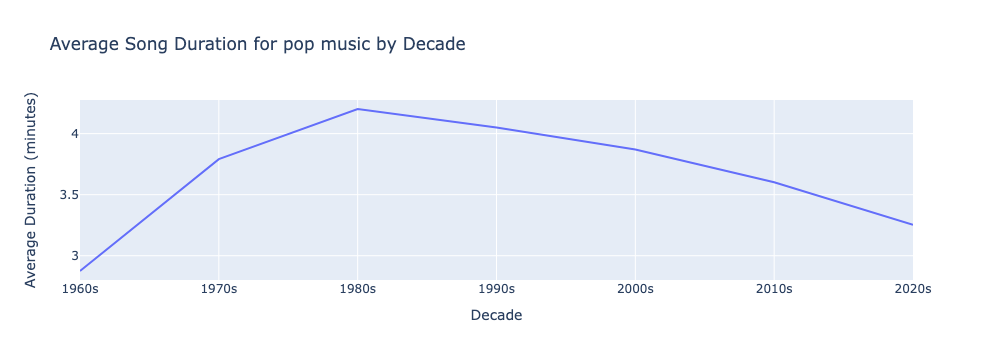

In [101]:
genre = input("Enter a music genre: ")
selected_data = big_df[big_df['main_genre'] == genre]
selected_data = selected_data.groupby('decade').mean(numeric_only=True)
fig = go.Figure(data=go.Scatter(x=selected_data.index, y = selected_data['minutes'], mode='lines'))
fig.update_layout(title='Average Song Duration for ' + genre +' music by Decade', xaxis_title='Decade', yaxis_title='Average Duration (minutes)')


In [145]:
#This section will be examaining are songs getting longer throughout the decades

In [262]:
#Total Song count by decade 
songs_count_by_decade = big_df.groupby('decade').size().reset_index(name='count')
songs_count_by_decade


,decade,count
0,1950s,13
1,1960s,429
2,1970s,1034
3,1980s,1368
4,1990s,2419
5,2000s,4960
6,2010s,18241
7,2020s,988


Enter a music genre:  rock


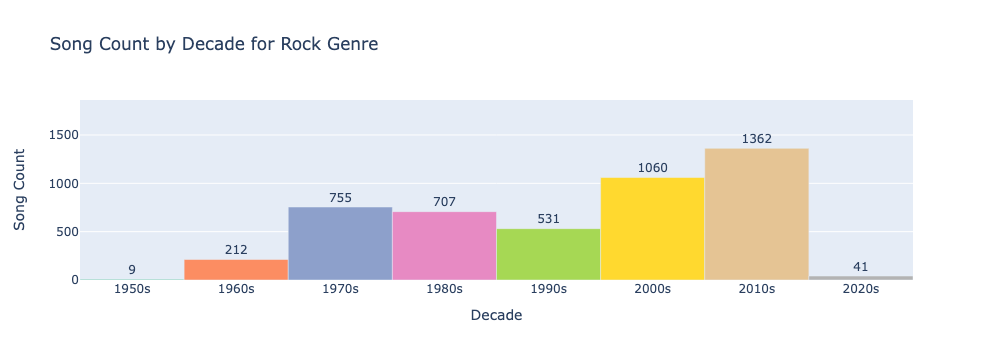

In [103]:
#Examaining Song count across decades by Genre
genre = input("Enter a music genre: ")
selected_data = big_df[big_df['main_genre'] == genre.lower()]
selected_data = selected_data.groupby('decade')['song'].count().reset_index()
fig = go.Figure(data=go.Bar(x=selected_data['decade'], y=selected_data['song'], 
                             marker_color=px.colors.qualitative.Set2, text=selected_data['song']))
fig.update_layout(title='Song Count by Decade for ' + genre.capitalize() + ' Genre', xaxis_title='Decade', yaxis_title='Song Count')
fig.update_traces(textposition='outside')
fig.update_layout(bargap=0)
max_count = selected_data['song'].max() + 500  # make sure to see all labels
fig.update_yaxes(range=[0, max_count])  
# Show the bar chart
fig.show()

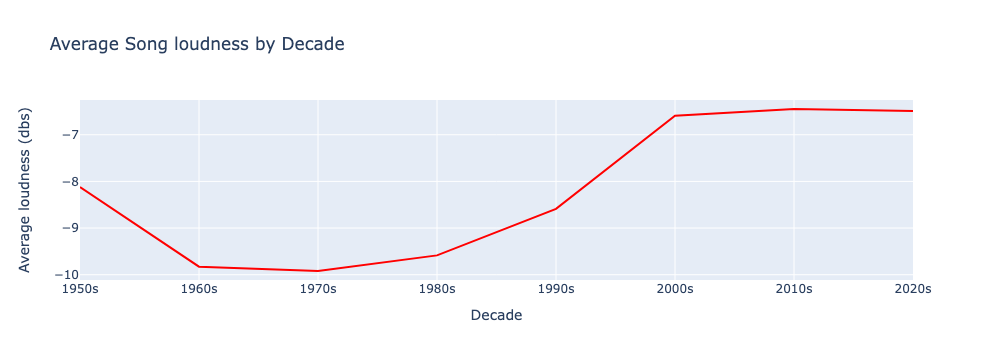

In [295]:
#Are songs getting Louder? 
# -7 is louder than -10, meaning songs are at an all time high in loudness 
fig = go.Figure(data=go.Scatter(x=dec.index, y = dec['loudness'], mode='lines'))
fig.update_traces(line_color='red')
fig.update_layout(title='Average Song loudness by Decade', xaxis_title='Decade', yaxis_title='Average loudness (dbs)')

Enter a music genre:  rock


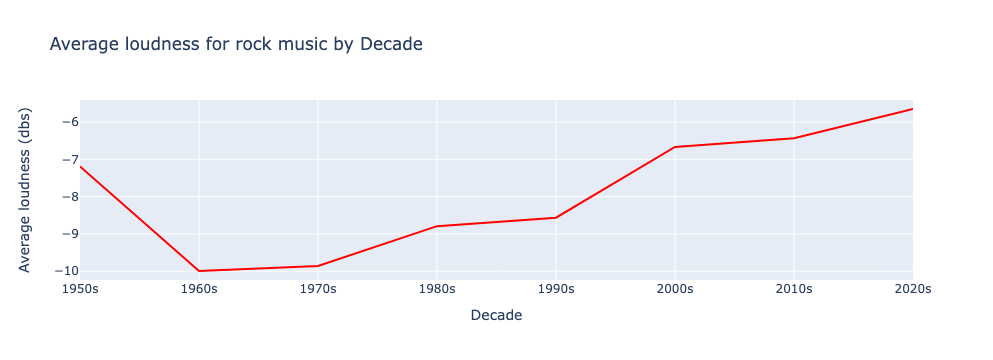

In [82]:
#dynamic and more in-depth
genre = input("Enter a music genre: ")
selected_data = big_df[big_df['main_genre'] == genre]
selected_data = selected_data.groupby('decade').mean(numeric_only=True)
fig = go.Figure(data=go.Scatter(x=selected_data.index, y = selected_data['loudness'], mode='lines'))
fig.update_traces(line_color='red')
fig.update_layout(title='Average loudness for ' + genre +' music by Decade', xaxis_title='Decade', yaxis_title='Average loudness (dbs)')
